## **필요한 라이브러리 가져오기**

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import scipy.stats as stats

import warnings
warnings.filterwarnings('ignore')

import matplotlib
import matplotlib.pyplot as plt
# plt.rcParams['font.family'] = 'Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] = False

## **3. 다중 선형 회귀 분석 (Multi Linear Regression)**
: 독립 변수 여러 개와 종속 변수 간의 선형 관계 모델링

\begin{equation}
\hat{y}(w,x) = w_0 + w_1 x_1 + ... + w_p x_p \tag{2}
\end{equation}

  + $x$: 입력 데이터
  + $w$: 모델이 학습할 파라미터
  + $w_0$: 편향
  + $w_1$~$w_p$: 가중치

### **3-1. 데이터 불러오기**

In [2]:
data_wine = pd.read_csv('../data/winequality-red.csv')

print("\n데이터 셋의 일부를 확인해보면 아래와 같습니다.")
data_wine.head()


데이터 셋의 일부를 확인해보면 아래와 같습니다.


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


<html>
    <b><font size=4>* 변수에 대한 설명</font></b><br><br>
- fixed acidity : 고정 산도<br>
- volatile acidity : 휘발성 산도<br>
- citric acid : 시트르산<br>
- residual sugar : 잔류 당분<br>
- chlorides : 염화물<br>
- free sulfur dioxide : 자유 이산화황<br>
- total sulfur dioxide : 총 이산화황<br>
- density : 밀도<br>
- pH : 산도<br>
- sulphates : 황산염<br>
- alcohol : 알콜 도수<br>
- quality : 0 ~ 10 (높을 수록 좋은 품질)
</html>

### **3-2. 데이터 전처리**
- 데이터 결측치 확인

In [3]:
data_wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

- 데이터 중복 확인

In [4]:
data_wine.duplicated().sum()

240

- 중복 데이터를 제거

In [5]:
clean_wine=data_wine.copy()
clean_wine.drop_duplicates(subset=None,inplace=True)

In [6]:
print("original data의 shape : ", data_wine.shape)
print("중복 데이터 제거 후 shape : ", clean_wine.shape)

original data의 shape :  (1599, 12)
중복 데이터 제거 후 shape :  (1359, 12)


- describe() 함수를 사용해서 수치형 변수들만을 기준으로 카운트, 평균, 표준편차, 최소/최댓값, 4분위 수를 확인

In [7]:
clean_wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000
mean,8.310596,0.529478,0.272333,2.523400,0.088124,15.893304,46.825975,0.996709,3.309787,0.658705,10.432315,5.623252
std,1.736990,0.183031,0.195537,1.352314,0.049377,10.447270,33.408946,0.001869,0.155036,0.170667,1.082065,0.823578
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996700,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.430000,2.600000,0.091000,21.000000,63.000000,0.997820,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


### **3-3. 데이터 시각화**
- 변수 간 상관 관계 파악

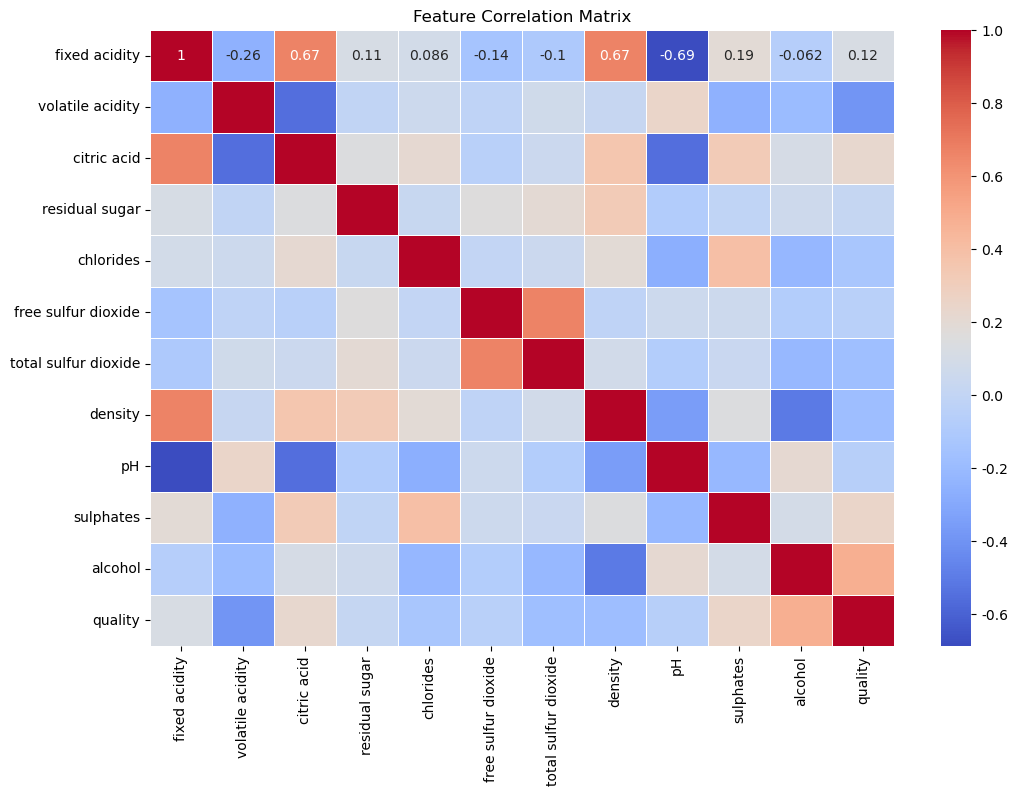

In [8]:
plt.figure(figsize=(12, 8))
sns.heatmap(clean_wine.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Feature Correlation Matrix')
plt.show()

- 각 특성의 분포에 대한 히스토그램

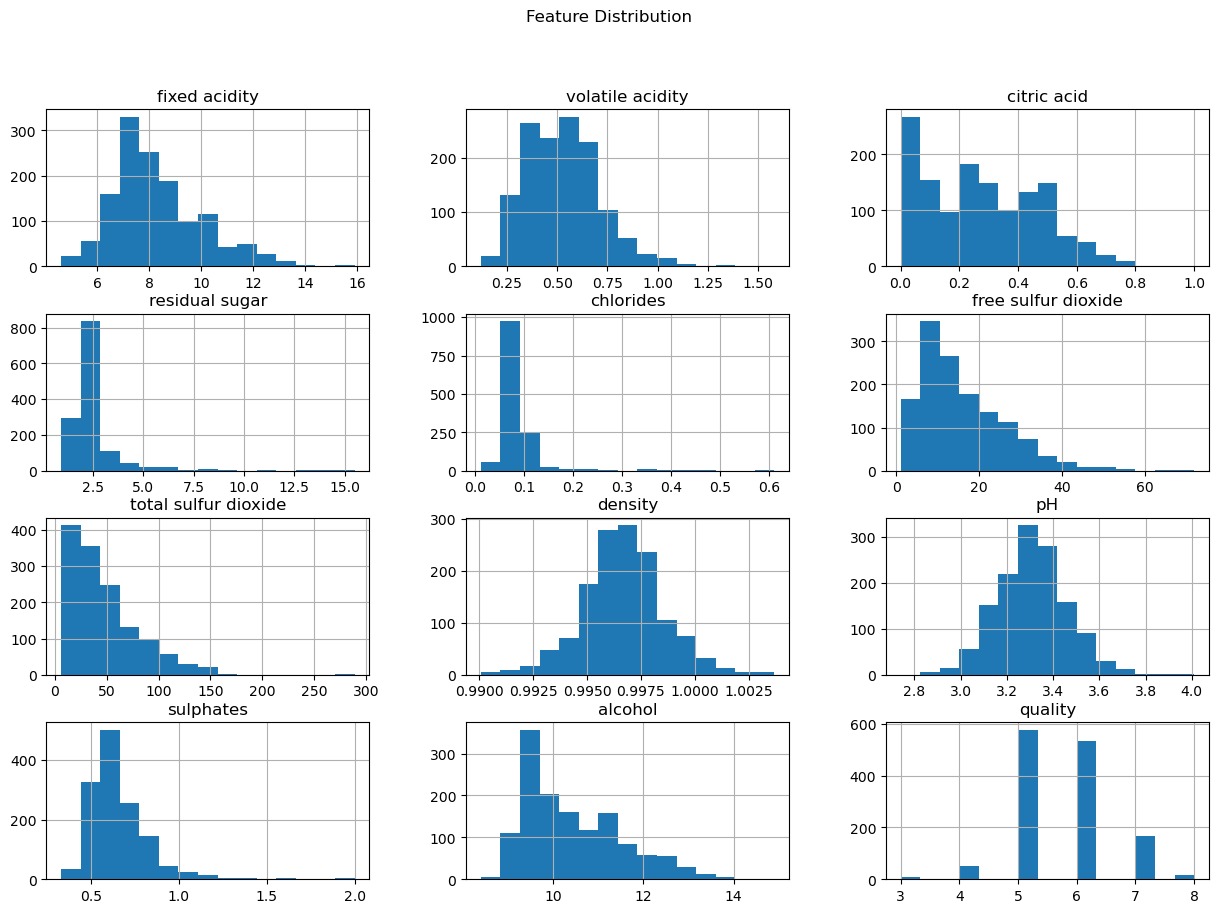

In [9]:
clean_wine.hist(bins=15, figsize=(15, 10), layout=(4, 3))
plt.suptitle('Feature Distribution')
plt.show()

### **3-4. 데이터 분리**
- 데이터를 학습 데이터 세트와 테스트 데이터 세트로 분리
- 데이터의 80%는 학습에 사용되고 20%는 테스트에 사용

In [10]:
# 독립 변수(X)와 종속 변수(y)를 정의

X_wine = clean_wine.drop('quality', axis=1)
y_wine = clean_wine['quality']

X_train_wine, X_test_wine, y_train_wine, y_test_wine = train_test_split(X_wine, y_wine, test_size=0.2, random_state=0)

print("\n학습 세트 크기:", X_train_wine.shape[0])
print("테스트 세트 크기:", X_test_wine.shape[0])


학습 세트 크기: 1087
테스트 세트 크기: 272


### **3-5. 모델 학습**
- LinearRegression 모델 생성 및 학습

In [11]:
lm = sm.OLS(y_train_wine, X_train_wine)
results_wine = lm.fit()

In [12]:
model_wine = LinearRegression()
model_wine.fit(X_train_wine, y_train_wine)

print("\n모델 계수(기울기):", model_wine.coef_[0])
print("모델 절편(y절편):", model_wine.intercept_)


모델 계수(기울기): 0.027583386167948146
모델 절편(y절편): 23.057726368253295


### **3-6. 모델 예측 수행**
- 테스트 데이터에 대한 연봉 예측

In [13]:
y_pred_wine = model_wine.predict(X_test_wine)

### **3-7. 모델 평가**
- MAE, MSE, R2 값을 비교하여 모델을 평가

In [14]:
mae_wine = mean_absolute_error(y_test_wine,y_pred_wine)
mse_wine = mean_squared_error(y_test_wine, y_pred_wine)
r2_wine = r2_score(y_test_wine, y_pred_wine)

print("\n[모델 평가 지표]")
print("\n- 평균 절대 오차 (MAE):", mae_wine)
print("- 평균 제곱 오차 (MSE):", mse_wine)
print("- R-제곱 (R2) 값:", r2_wine)


[모델 평가 지표]

- 평균 절대 오차 (MAE): 0.5590440324574897
- 평균 제곱 오차 (MSE): 0.5368945009443011
- R-제곱 (R2) 값: 0.22489896466401604


### **3-8. 시각화를 통한 결과 비교**

- 예측값과 실제값의 Box plot

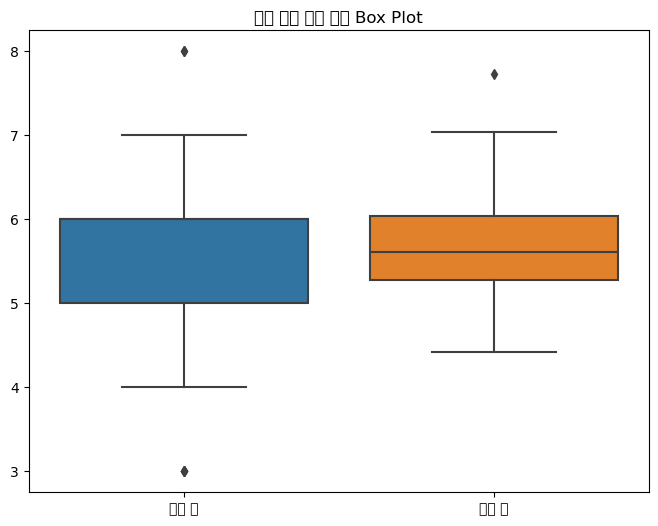

In [15]:
# 실제 값과 예측 값의 DataFrame 생성
df = pd.DataFrame({'실제 값': y_test_wine, '예측 값': y_pred_wine})

# 박스 플롯 그리기
plt.figure(figsize=(8, 6))
sns.boxplot(data=df)
plt.title('실제 값과 예측 값의 Box Plot')
plt.show()

***

## **4. Coefficient**

- coefficient : 각 feature가 종속 변수에 미치는 영향을 나타내는 값
- 값이 양수면, 그 Feature는 종속 변수에 양의 영향을 미침
- 값이 음수면, 그 Feature는 종속 변수에 음의 영향을 미침

In [16]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# 모델의 Coefficient 추출
coefficients = pd.DataFrame(model_wine.coef_, X_test_wine.columns)
coefficients.columns = ['coefficients']

# Coefficient 값을 기준으로 정렬
coefficients = coefficients.sort_values(by='coefficients', ascending=False)

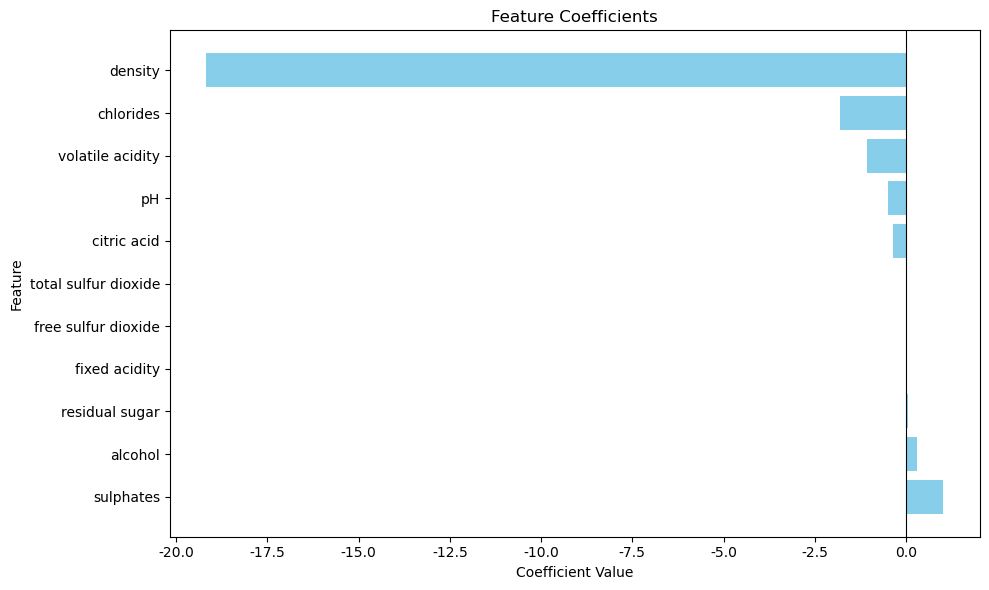

Top 5 influential features:
                  coefficients  abs_coefficients
density             -19.167959         19.167959
chlorides            -1.798709          1.798709
volatile acidity     -1.061445          1.061445
sulphates             1.016101          1.016101
pH                   -0.493176          0.493176


In [17]:
# Coefficient를 시각화
plt.figure(figsize=(10, 6))
plt.barh(coefficients.index, coefficients['coefficients'], color='skyblue')
plt.axvline(0, color='black', linewidth=0.8)  # 0 기준선
plt.title('Feature Coefficients')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

# Coefficient와 Feature의 절대값 비교 (상위 Feature 분석)
coefficients['abs_coefficients'] = coefficients['coefficients'].abs()
top_features = coefficients.nlargest(5, 'abs_coefficients')  # 영향력이 큰 상위 5개 Feature

print("Top 5 influential features:")
print(top_features)

Feature Coefficient 분석 요약
- density는 가장 큰 음의 영향을 미치는 주요 Feature로 확인됨 (-19.17).
- chlorides와 volatile acidity는 종속 변수에 부정적인 영향을 미침.
- sulphates는 종속 변수에 긍정적인 영향을 주는 주요 Feature로 분석됨.
- 절대값 기준 상위 5개 Feature 중 density의 영향력이 압도적으로 큼.
- 분석 결과는 모델의 Feature 중요도 이해 및 데이터 전처리에 활용 가능.

***

## **5. VIF(Variance Inflation Factor)**

- VIF는 다중공선성을 진단하기 위한 지표
- 다중공선성이란 독립 변수들 간의 상관관계가 높아 회귀 분석에서 계수 추정의 신뢰성을 저하시킬 수 있는 문제를 의미 </br></br>

**[VIF 값 기준]**
- VIF < 5: 다중공선성이 거의 없음.
- 5 ≤ VIF < 10: 다중공선성이 의심되는 수준.
- VIF ≥ 10: 다중공선성이 매우 높음.

                 Feature       VIF
0          fixed acidity  7.880951
7                density  6.281009
8                     pH  3.397407
10               alcohol  3.140944
2            citric acid  3.124679
6   total sulfur dioxide  2.216688
5    free sulfur dioxide  1.950922
1       volatile acidity  1.777884
3         residual sugar  1.641987
4              chlorides  1.530769
9              sulphates  1.466779


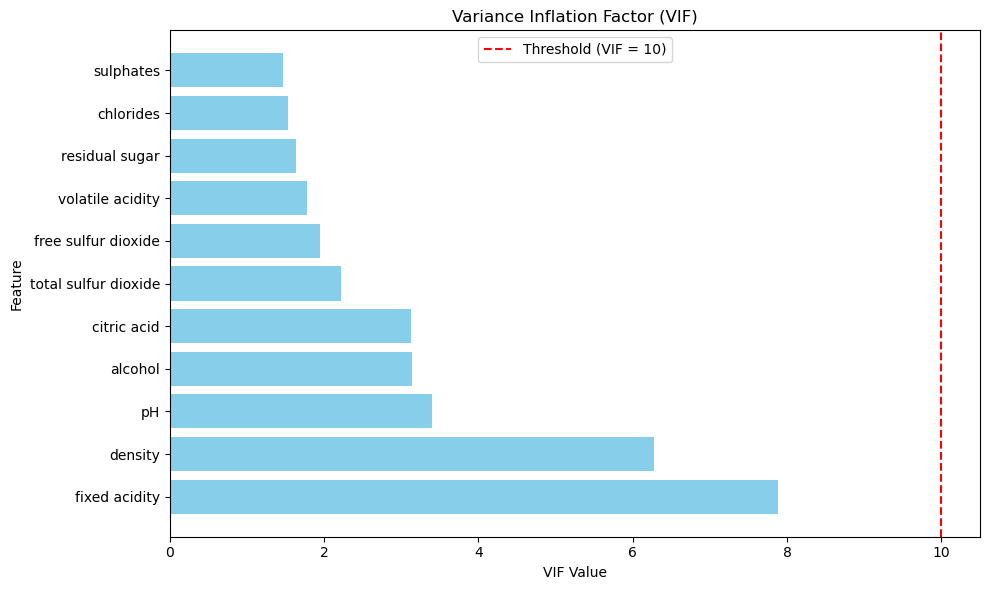

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler

# 데이터 준비 (독립 변수 선택)
# 예: df에 포함된 독립 변수들
X_wine = clean_wine.drop('quality', axis=1)

# VIF 계산
# 데이터를 표준화 (스케일 차이를 줄이기 위해)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_wine)

# VIF 계산 및 데이터프레임 생성
vif_data = pd.DataFrame()
vif_data["Feature"] = X_wine.columns
vif_data["VIF"] = [variance_inflation_factor(X_scaled, i) for i in range(X_scaled.shape[1])]

# VIF 값 기준 정렬
vif_data = vif_data.sort_values(by="VIF", ascending=False)

# VIF 결과 출력
print(vif_data)

# 시각화
plt.figure(figsize=(10, 6))
plt.barh(vif_data["Feature"], vif_data["VIF"], color="skyblue")
plt.axvline(10, color="red", linestyle="--", label="Threshold (VIF = 10)")
plt.title("Variance Inflation Factor (VIF)")
plt.xlabel("VIF Value")
plt.ylabel("Feature")
plt.legend()
plt.tight_layout()
plt.show()


- 대부분의 Feature는 VIF < 5로 다중공선성이 낮아 모델에 적합.
- fixed acidity(7.88)와 density(6.28)는 다중공선성이 의심됨.
- 다중공선성이 높은 변수는 모델 안정성을 저하시킬 가능성이 있음.
- fixed acidity와 density를 제거하거나 차원 축소(PCA) 적용을 고려.
- 전체적으로 다중공선성 문제는 심각하지 않음.

***

## **6. 선형 회귀 모델의 주요 가정 사항**
1. 선형성 (Linearity)
2. 정규성 (Normality)
3. 등분산성 (Equal Variance)
4. 독립성 (Independence)

### **6-1 선형성 (Linearity)**
종속변수는 독립변수의 선형 조합으로 추정한다.

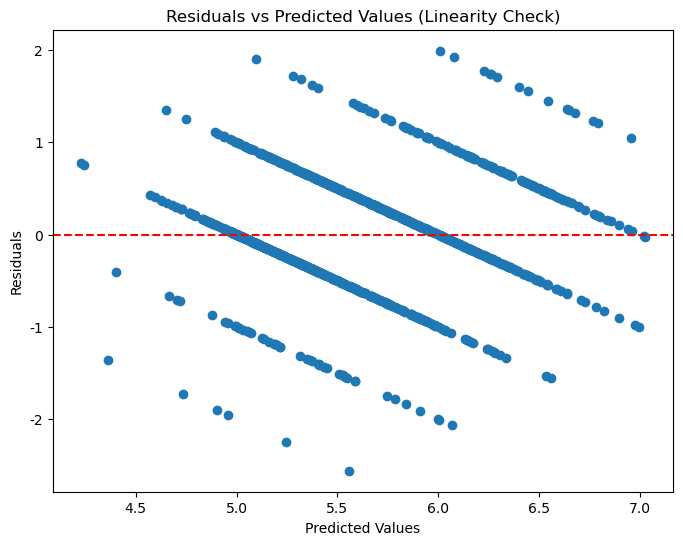

In [30]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(results_wine.fittedvalues, results_wine.resid)   # 예측값 vs 잔차
plt.axhline(y=0, color='red', linestyle='--')                # 잔차 평균(0) 기준선
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values (Linearity Check)')
plt.show()

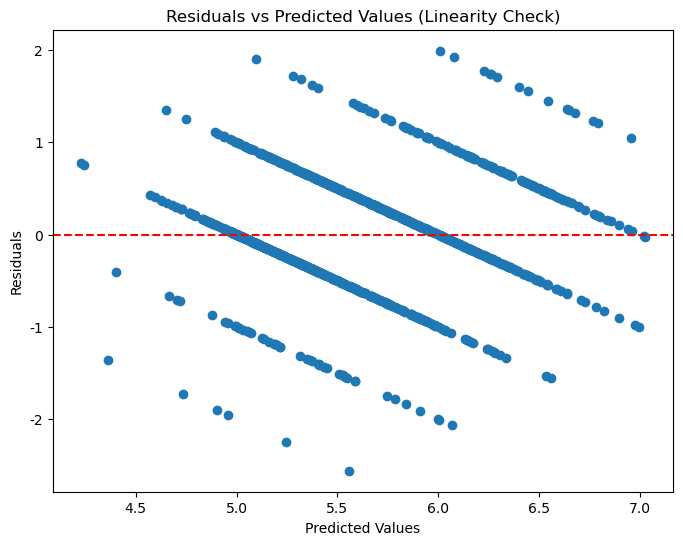

In [29]:
# Residual Plot

plt.figure(figsize=(8, 6))
plt.scatter(results_wine.fittedvalues, results_wine.resid)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values (Linearity Check)')
plt.show()

### **6-2 정규성 (Normality)**
오차항은 서로 독립이고 평균 0의 정규분포를 따른다.

<Figure size 600x600 with 0 Axes>

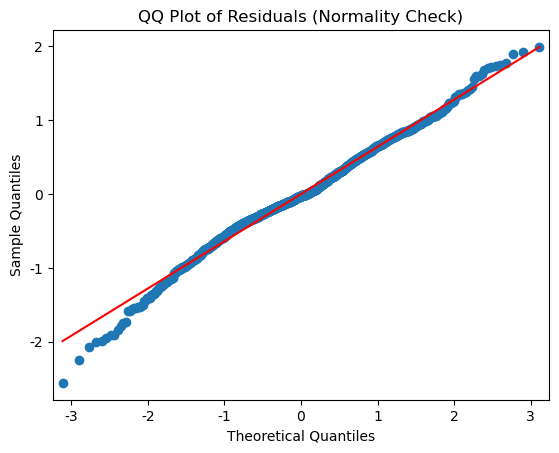

In [25]:
# QQ plot

plt.figure(figsize=(6, 6))
sm.qqplot(results_wine.resid, line='s')
plt.title('QQ Plot of Residuals (Normality Check)')
plt.show()

 파란색 점들이 빨간색 선에 근접한 경우 잔차들이 정규 분포에 가까워짐을 의미 <br> 즉, Regression 모델의 가정 중 하나인 "잔차가 정규분포를 따른다" 가정을 충족시킴

### **6-3 등분산성 (Equal Variance)**
오차의 분산은 등분산 속성을 갖는다.

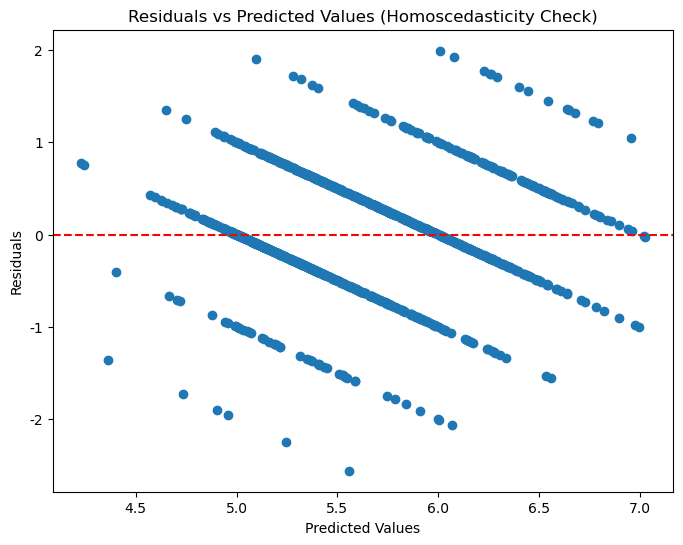

In [31]:
# 잔차와 예측 값의 산점도 (등분산성 확인)
plt.figure(figsize=(8, 6))
plt.scatter(results_wine.fittedvalues, results_wine.resid)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values (Homoscedasticity Check)')
plt.show()


### **6-4 독립성 (Independence)**
각 독립변수(확률변수)는 서로 독립 관계이다.

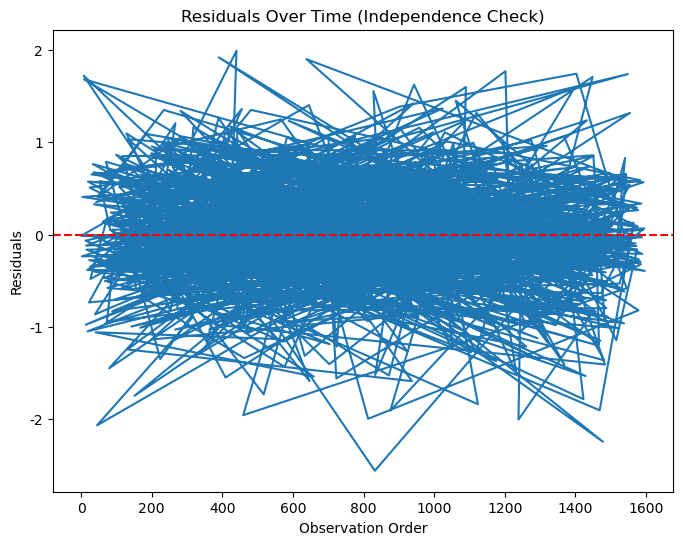

In [27]:
plt.figure(figsize=(8, 6))
plt.plot(results_wine.resid)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Observation Order')
plt.ylabel('Residuals')
plt.title('Residuals Over Time (Independence Check)')
plt.show()